In [2]:
pip install geocoder

     |████████████████████████████████| 98 kB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shapely

     |████████████████████████████████| 1.4 MB 7.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pyproj

     |████████████████████████████████| 5.9 MB 6.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install geopandas

     |████████████████████████████████| 1.1 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 18.6 MB 137.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import geocoder
from shapely.geometry import Point, Polygon
from pyproj import CRS
import geopandas as gpd
import matplotlib.pyplot as plt

## read in files

In [12]:
block = gpd.read_file("/Users/jianingcai/Downloads/tl_2020_42003_tabblock20/tl_2020_42003_tabblock20.shp")

In [13]:
block

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,42,003,290400,1020,420032904001020,Block 1020,G5040,NaN,NaN,NaN,S,14013,0,+40.3846494,-079.9864920,"POLYGON ((-79.98860 40.38480, -79.98433 40.384..."
1,42,003,564400,4020,420035644004020,Block 4020,G5040,NaN,NaN,NaN,S,330472,0,+40.3819938,-079.7993370,"POLYGON ((-79.80365 40.38260, -79.80330 40.382..."
2,42,003,191800,6004,420031918006004,Block 6004,G5040,NaN,NaN,NaN,S,30636,0,+40.3877118,-080.0097222,"POLYGON ((-80.01082 40.38821, -80.01062 40.388..."
3,42,003,564400,4015,420035644004015,Block 4015,G5040,NaN,NaN,NaN,S,7367,0,+40.3866596,-079.7949479,"POLYGON ((-79.79530 40.38737, -79.79520 40.387..."
4,42,003,290400,1012,420032904001012,Block 1012,G5040,NaN,NaN,NaN,S,13900,0,+40.3861631,-079.9899899,"POLYGON ((-79.99101 40.38629, -79.99012 40.386..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24782,42,003,475101,3005,420034751013005,Block 3005,G5040,NaN,NaN,NaN,S,72608,0,+40.3442018,-080.0440330,"POLYGON ((-80.04567 40.34508, -80.04517 40.345..."
24783,42,003,475101,3013,420034751013013,Block 3013,G5040,NaN,NaN,NaN,S,44124,0,+40.3419191,-080.0417571,"POLYGON ((-80.04365 40.34287, -80.04337 40.343..."
24784,42,003,475102,1012,420034751021012,Block 1012,G5040,NaN,NaN,NaN,S,131860,0,+40.3366792,-080.0415310,"POLYGON ((-80.04387 40.33798, -80.04385 40.338..."
24785,42,003,475101,3001,420034751013001,Block 3001,G5040,NaN,NaN,NaN,S,124610,0,+40.3446465,-080.0362968,"POLYGON ((-80.03990 40.34661, -80.03987 40.346..."


<AxesSubplot:>

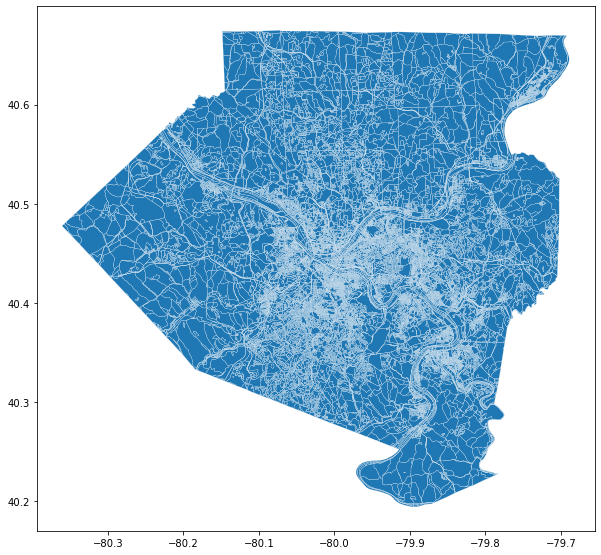

In [16]:
# draw out the blocks plot
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
block.plot(ax = ax, edgecolor = "white", linewidth = 0.2)

In [51]:
# read in csv file about the points
pa = pd.read_csv("/Users/jianingcai/Documents/GitHub/national_address_database/data/state_county/pa_allegany.csv.xz", compression = "xz")

In [52]:
pa

,state,county,zip,longitude,latitude,address,id
0,pa,allegany,14897,-77.824812,41.998112,"436 teeter road,whitesville,pa,14897",pa_allegany
1,pa,allegany,14897,-77.830647,41.998139,"424 teeter road,whitesville,pa,14897",pa_allegany


In [53]:
# convert pa dataframe into a geo dataframe
geometry=[Point(xy) for xy in zip(pa["longitude"], pa["latitude"])]
crs= CRS('epsg:4326')
pa_map = gpd.GeoDataFrame(pa,crs=crs, geometry=geometry)

## do spatial join on the points geodataframe and block geodataframe

In [54]:
pa_map.crs = block.crs

In [60]:
join_left_df = gpd.sjoin(block, pa_map, how="right")
join_left_df

,index_left,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,random_point_lat,random_point_lng,state,county,zip,longitude,latitude,address,id,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,pa,allegany,14897,-77.824812,41.998112,"436 teeter road,whitesville,pa,14897",pa_allegany,POINT (-77.82481 41.99811)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,pa,allegany,14897,-77.830647,41.998139,"424 teeter road,whitesville,pa,14897",pa_allegany,POINT (-77.83065 41.99814)


## visually test if the points are inside any blocks

<AxesSubplot:>

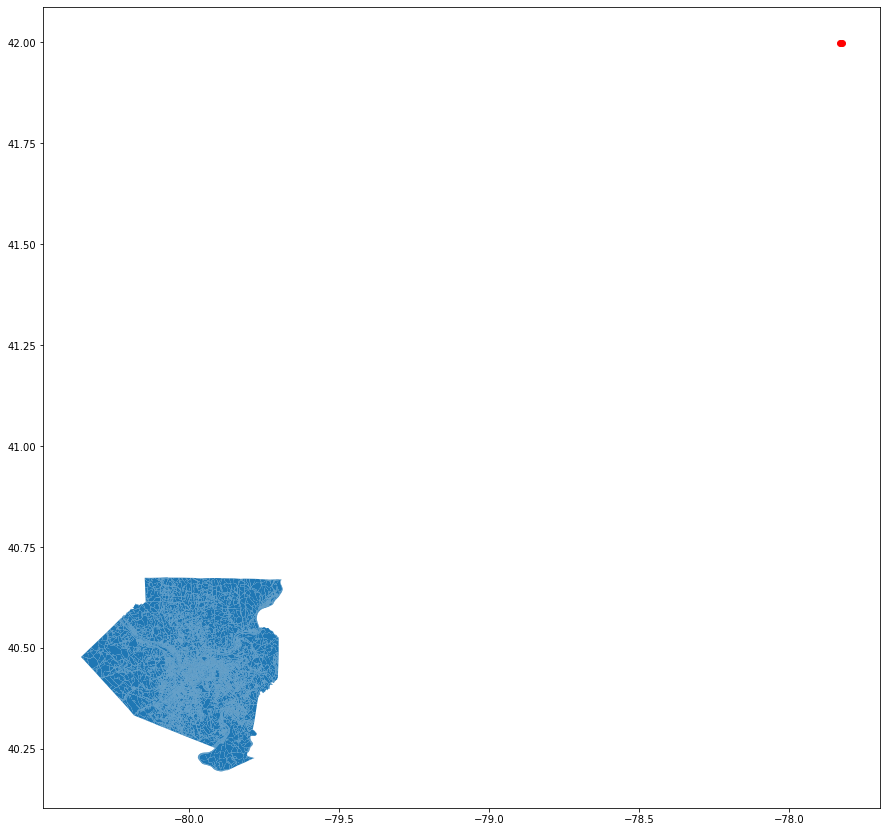

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
block.plot(ax = ax)#, edgecolor = "black")
pa_map.plot(ax = ax, color = "red")

## try to use the whole pa state tracks

In [57]:
blk = gpd.read_file("/Users/jianingcai/Downloads/tl_2020_42_tabblock20/tl_2020_42_tabblock20.shp")

In [58]:
pa_map.crs = block.crs

In [61]:
join_left_df2 = gpd.sjoin(blk, pa_map, how="right")
join_left_df2

,index_left,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,INTPTLAT20,INTPTLON20,state,county,zip,longitude,latitude,address,id,geometry
0,30082,42,105,950101,2004,421059501012004,Block 2004,G5040,NaN,NaN,...,+41.9954127,-077.8268681,pa,allegany,14897,-77.824812,41.998112,"436 teeter road,whitesville,pa,14897",pa_allegany,POINT (-77.82481 41.99811)
1,30082,42,105,950101,2004,421059501012004,Block 2004,G5040,NaN,NaN,...,+41.9954127,-077.8268681,pa,allegany,14897,-77.830647,41.998139,"424 teeter road,whitesville,pa,14897",pa_allegany,POINT (-77.83065 41.99814)


In [69]:
join_left_df2.county = "potter"

,index_left,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,INTPTLAT20,INTPTLON20,state,county,zip,longitude,latitude,address,id,geometry
0,30082,42,105,950101,2004,421059501012004,Block 2004,G5040,NaN,NaN,...,+41.9954127,-077.8268681,pa,potter,14897,-77.824812,41.998112,"436 teeter road,whitesville,pa,14897",pa_allegany,POINT (-77.82481 41.99811)
1,30082,42,105,950101,2004,421059501012004,Block 2004,G5040,NaN,NaN,...,+41.9954127,-077.8268681,pa,potter,14897,-77.830647,41.998139,"424 teeter road,whitesville,pa,14897",pa_allegany,POINT (-77.83065 41.99814)


## generate points inside the blocks

In [42]:
def generate_coordinates(polygon):   
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = np.random.uniform( minx, maxx )
        y = np.random.uniform( miny, maxy )
        if polygon.contains(Point(x, y)): 
            # reverse
            return x, y
        

In [43]:
for i in range(0, len(block)):
    #print(b)
    x, y = generate_coordinates(block.loc[i, 'geometry'])
    block.loc[i, 'random_point_lat'] = x
    block.loc[i, 'random_point_lng'] = y

In [44]:
block

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,random_point_lat,random_point_lng
0,42,003,290400,1020,420032904001020,Block 1020,G5040,NaN,NaN,NaN,S,14013,0,+40.3846494,-079.9864920,"POLYGON ((-79.98860 40.38480, -79.98433 40.384...",-79.988099,40.384699
1,42,003,564400,4020,420035644004020,Block 4020,G5040,NaN,NaN,NaN,S,330472,0,+40.3819938,-079.7993370,"POLYGON ((-79.80365 40.38260, -79.80330 40.382...",-79.799339,40.381252
2,42,003,191800,6004,420031918006004,Block 6004,G5040,NaN,NaN,NaN,S,30636,0,+40.3877118,-080.0097222,"POLYGON ((-80.01082 40.38821, -80.01062 40.388...",-80.009366,40.388218
3,42,003,564400,4015,420035644004015,Block 4015,G5040,NaN,NaN,NaN,S,7367,0,+40.3866596,-079.7949479,"POLYGON ((-79.79530 40.38737, -79.79520 40.387...",-79.794851,40.386979
4,42,003,290400,1012,420032904001012,Block 1012,G5040,NaN,NaN,NaN,S,13900,0,+40.3861631,-079.9899899,"POLYGON ((-79.99101 40.38629, -79.99012 40.386...",-79.990805,40.385631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24782,42,003,475101,3005,420034751013005,Block 3005,G5040,NaN,NaN,NaN,S,72608,0,+40.3442018,-080.0440330,"POLYGON ((-80.04567 40.34508, -80.04517 40.345...",-80.043942,40.344471
24783,42,003,475101,3013,420034751013013,Block 3013,G5040,NaN,NaN,NaN,S,44124,0,+40.3419191,-080.0417571,"POLYGON ((-80.04365 40.34287, -80.04337 40.343...",-80.040736,40.341229
24784,42,003,475102,1012,420034751021012,Block 1012,G5040,NaN,NaN,NaN,S,131860,0,+40.3366792,-080.0415310,"POLYGON ((-80.04387 40.33798, -80.04385 40.338...",-80.042051,40.337284
24785,42,003,475101,3001,420034751013001,Block 3001,G5040,NaN,NaN,NaN,S,124610,0,+40.3446465,-080.0362968,"POLYGON ((-80.03990 40.34661, -80.03987 40.346...",-80.033113,40.344678


In [45]:
random_points = [Point(xy) for xy in zip(block["random_point_lat"], block["random_point_lng"])]

In [46]:
crs= CRS('epsg:4326')
random_points_map = gpd.GeoDataFrame(random_points,crs=crs, geometry=random_points)

<AxesSubplot:>

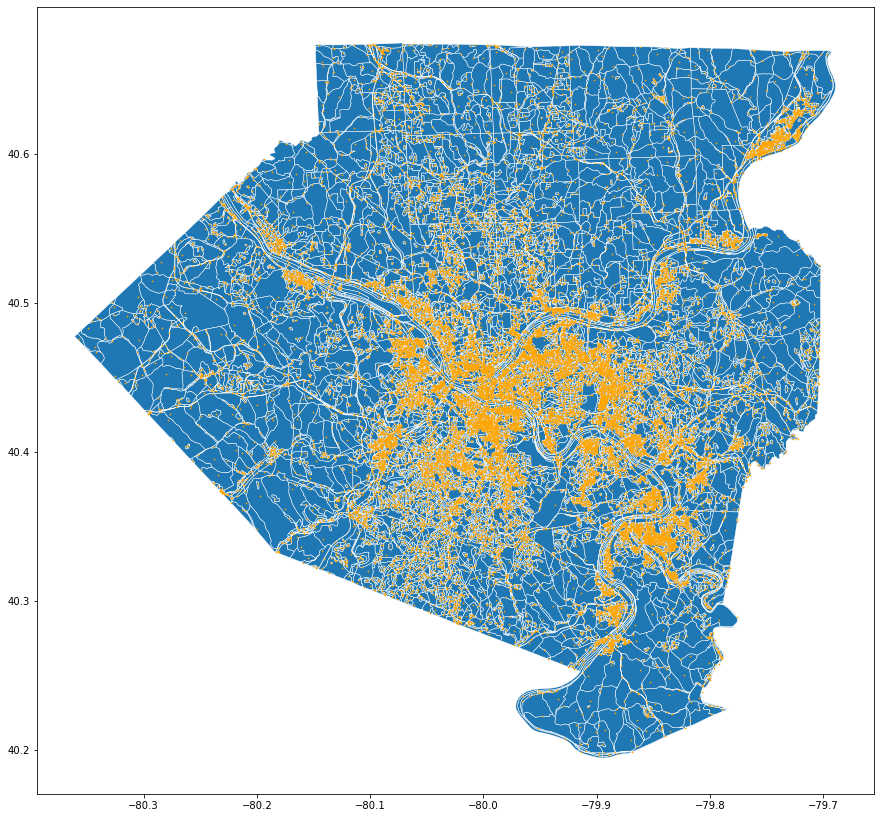

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
block.plot(ax = ax, edgecolor = "white", linewidth = 0.5)#, edgecolor = "black")
random_points_map.plot(ax = ax, color = "orange", markersize = 0.5)


In [18]:
len(block.GEOID20.unique())

24787

In [ ]:
for i in range(0, len(block)):
    x = block.loc[i, 'random_point_lat'] 
    y = block.loc[i, 'random_point_lng'] 
    result = geocoder.bing([x, y], method = "reverse", key = "An0lDWpMaQxpHz_yRGUihycKpSmv1UG6_JryfLZgyPbleFH2s4ObalS4QWAn2KQE")

In [19]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [20]:
geolocator = Nominatim(user_agent = "UVA_BII", timeout = 5)
reverse = RateLimiter(geolocator.reverse, min_delay_seconds = 1, max_retries = 1)

In [22]:
for i in range(0, 10):
    x = block.loc[i, 'random_point_lat'] 
    y = block.loc[i, 'random_point_lng'] 
    #result = geocoder.bing([x, y], method = "reverse", key = "An0lDWpMaQxpHz_yRGUihycKpSmv1UG6_JryfLZgyPbleFH2s4ObalS4QWAn2KQE")
    block.loc[i, 'random_point_address'] = reverse("{}, {}".format(x, y)).raw['address']

AttributeError: 'NoneType' object has no attribute 'raw'